In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

bounds = np.asarray([(0.0, 35.0), (0.0, 35.0)]).T 
ITERATION = 16

In [2]:
CTAB = 96
GCH = 59
GS = 24 

In [3]:
comps = np.load('./data/comps_%d.npy'%ITERATION)
n_samples = len(comps)
SN = np.round(comps[:,0].reshape(-1,1)).astype(int)
AA = np.round(comps[:,1].reshape(-1,1)).astype(int)

In [4]:
CTAB_ = np.array([CTAB]*n_samples).reshape(-1,1)
GCH_ = np.array([GCH]*n_samples).reshape(-1,1)
GS = np.array([GS]*n_samples).reshape(-1,1)

volumes = np.hstack((CTAB_, GCH_, AA, SN, GS))
WATER = 300 - np.sum(volumes, axis=1).reshape(-1,1)
volumes_ = np.hstack((CTAB_, WATER, GCH_, AA, SN, GS))
volume_df = pd.DataFrame(volumes_, columns=['CTAB', 'Water', 'GCH', 'AA', 'SN', 'GS'])
volume_df

,CTAB,Water,GCH,AA,SN,GS
0,96,115,59,4,2,24
1,96,100,59,4,17,24
2,96,110,59,9,2,24
3,96,98,59,6,17,24
4,96,95,59,9,17,24
5,96,103,59,11,7,24
6,96,99,59,13,9,24
7,96,95,59,15,11,24
8,96,106,59,13,2,24
9,96,86,59,29,6,24


In [5]:
print("Total volumes needed : \n", volume_df.sum())

Total volumes needed : 
 CTAB     1440
Water    1466
GCH       885
AA        210
SN        139
GS        360
dtype: int64


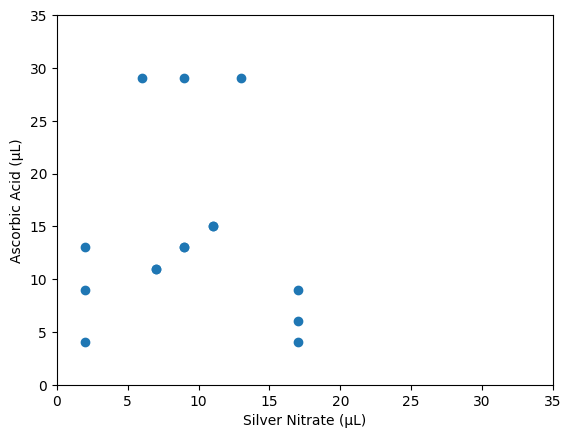

In [6]:
fig, ax = plt.subplots()
ax.scatter(volume_df["SN"], volume_df["AA"])
ax.set_xlim([bounds[0,0], bounds[1,0]])
ax.set_ylim([bounds[0,1], bounds[1,1]])
ax.set_xlabel("Silver Nitrate (µL)")
ax.set_ylabel("Ascorbic Acid (µL)")
plt.show()

In [7]:
volume_df.to_csv('./opentrons/volumes_%d.csv'%(ITERATION),index=False)